In [41]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [42]:
# load data
apple_df = pd.read_csv("data/clean/AAPL_feature_engineered.csv")


In [43]:

closing_prices = apple_df['Close'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler to bring values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [44]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Choose the sequence length (number of previous time steps to use as input features)
seq_length = 10

# Create input sequences and target values
X, y = create_sequences(scaled_prices, seq_length)

In [45]:
# Determine the split point for train and test sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [46]:
from sklearn.model_selection import TimeSeriesSplit

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        print("TRAIN:", train_index, "TEST:", test_index)
        print("X_train:", X_train.shape, "X_test:", X_test.shape)
        print("y_train:", y_train.shape, "y_test:", y_test.shape)


# # split data

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236] TEST: [237 238 239 240 241 242

In [47]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
print(trainX.shape)
print(testX.shape)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(2289, 8)
(228, 8)
(2289, 1, 8)
(228, 1, 8)


In [48]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.utils.vis_utils import plot_model

#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [49]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
287/287 [==============================] - 2s 1ms/step - loss: 8416.8574
Epoch 2/100
287/287 [==============================] - 0s 1ms/step - loss: 7219.0518
Epoch 3/100
287/287 [==============================] - 0s 1ms/step - loss: 4700.2969
Epoch 4/100
287/287 [==============================] - 0s 1ms/step - loss: 2568.6956
Epoch 5/100
287/287 [==============================] - 0s 1ms/step - loss: 1435.5103
Epoch 6/100
287/287 [==============================] - 0s 1ms/step - loss: 970.0198
Epoch 7/100
287/287 [==============================] - 0s 1ms/step - loss: 640.4501
Epoch 8/100
287/287 [==============================] - 0s 1ms/step - loss: 427.6672
Epoch 9/100
287/287 [==============================] - 0s 1ms/step - loss: 273.9483
Epoch 10/100
287/287 [==============================] - 0s 1ms/step - loss: 166.8926
Epoch 11/100
287/287 [==============================] - 0s 2ms/step - loss: 101.3288
Epoch 12/100
287/287 [==============================] - 0s 2ms/step -

In [50]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 978us/step


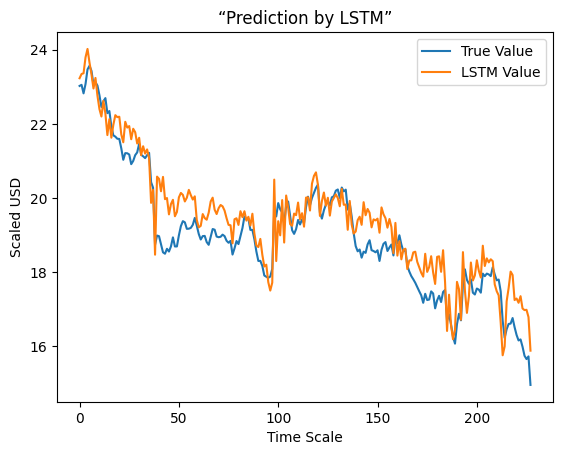

In [51]:
import matplotlib.pyplot as plt

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('“Prediction by LSTM”')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()